In [670]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time
from PIL import Image, ImageDraw
from numpy import asarray
from math import atan2,degrees,radians

In [2]:
def show_data():
    train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(1,22):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['X'] = data.X.astype(float)
            data.Time = data.Time.str.replace("00:","").astype(np.float64)
            
            fig=plt.figure(figsize=(20,5))

            ax= fig.add_subplot(1, 2, 1)
            ax.plot(data.Pressure,"#FF8000")
            ax.set_title("Pressure",fontdict={'fontsize': 20})

            ax2 = fig.add_subplot(1, 2, 2)
            ax2.plot(data.Time,c='b')
            ax2.set_title("Time",fontdict={'fontsize': 20})

            plt.show()
            hand_lifts = 0
            rolling_std = data.Time.rolling(window=20).std()

            for i in range(len(data.Time)-1):
                if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
                    hand_lifts +=1

            print("Number of hand lifts: " + str(hand_lifts))

>  Notice that file number 22 does not exist (there is only an empty image), we will ignore this file.

In [941]:
data = pd.read_csv(r'train/7554/SimpleTest/1.csv')

In [942]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          134 non-null    object 
 1    Y         132 non-null    float64
 2    Pressure  132 non-null    float64
 3    TiltX     132 non-null    float64
 4    TiltY     132 non-null    float64
 5    Time      132 non-null    object 
dtypes: float64(4), object(2)
memory usage: 6.4+ KB


In [943]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6099853
1,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6256038
2,926.692689687031,665.647303,0.082506,-4917.0,669.0,00:12.6445684


In [944]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)
print(start_time)
print(submit_time)

total_time = float(submit_time[37:]) - float(start_time[38:])
print("Total time drawing: 00:" +str(total_time))

Time Elapsed till drawing started: 00:11.2234987
Time Elapsed till drawing submit: 00:17.1449348
Total time drawing: 00:5.921436100000001


In [945]:
data['X'] = data.X.astype(float)

In [946]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

In [947]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,925.90276,665.541979,0.045884,-4917.0,669.0,12.609985
1,925.90276,665.541979,0.045884,-4917.0,669.0,12.625604
2,926.69269,665.647303,0.082506,-4917.0,669.0,12.644568


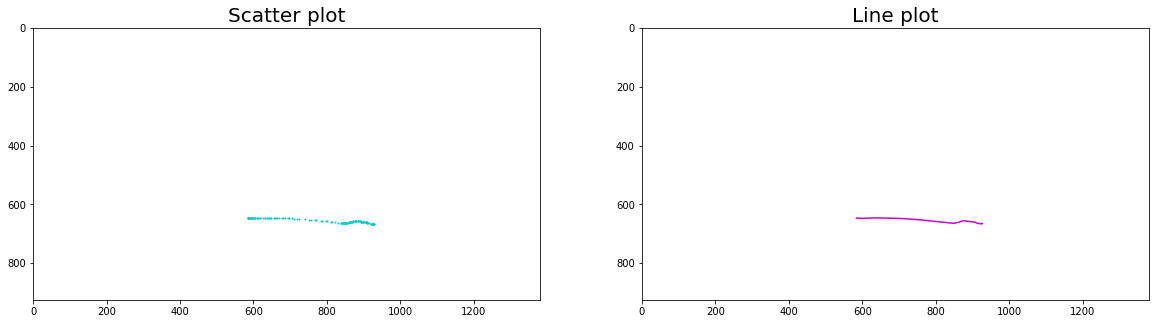

In [948]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

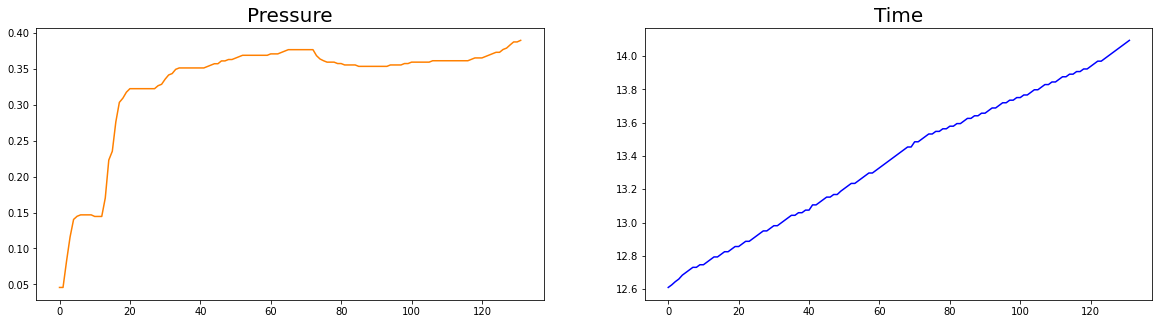

In [949]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [950]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=14).std()

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 0


## *Number of lines:*

In [951]:
def direction(destination_x,origin_x,destination_y,origin_y):
    deltaX = destination_x - origin_x
    deltaY = destination_y - origin_y
    degrees_temp = math.atan2(deltaX,deltaY)/(math.pi*180)
    if degrees_temp < 0:
        degress_final = 360 + degrees_temp
    else:
        degress_final = degrees_temp
    return degress_final

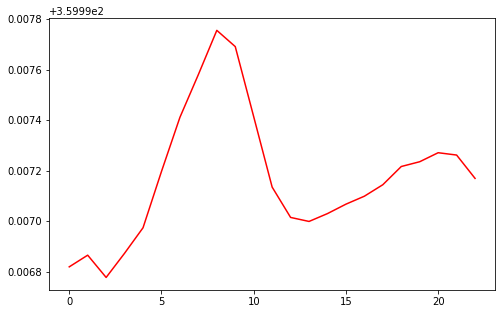

In [952]:
angels = [] 

for i in range(0,len(data.X)-20,5):
    angels.append(direction(data.X[i+20],data.X[i],data.Y[i+20],data.Y[i]))
    #angels.append(degrees(angel))

angels = pd.Series(angels)

fig = plt.figure(figsize=(8, 5))
fig.add_subplot(1, 1, 1)
plt.plot(angels,"r")

In [953]:
angels.to_list()

[359.9968192824931,
 359.9968654949197,
 359.99677730350817,
 359.99687315023226,
 359.9969740548033,
 359.9971969612512,
 359.9974113447291,
 359.99758075074374,
 359.9977558390736,
 359.99769152416036,
 359.9974138625614,
 359.99713509016993,
 359.9970149716103,
 359.9969990794573,
 359.997030217595,
 359.99706750788334,
 359.997099045892,
 359.99714453150506,
 359.9972166472462,
 359.99723558847,
 359.99727123429363,
 359.9972620251875,
 359.9971695483976]

In [959]:
numOfLines = 1
rolling_std = angels.std()

for i in range(1,len(angels)-1):
    if (abs(angels[i+1] - angels[i]) <0.05) :
        continue
    elif (angels[i+1] > angels[i] + rolling_std) or (angels[i+1] < angels[i] - rolling_std) :
        numOfLines = numOfLines + 1

print("Number of lines: " + str(numOfLines))

Number of lines: 1


## *Open or closed shape:*
Only relevant for some of the drawings.

(3,4,8,11,13,16,17,19,20,21)

In [955]:
img = Image.open(r'train/7554/SimpleTest/3.PNG')
img = img.convert("RGB")
img = img.crop((0,220,1360,885))

In [956]:
target_pixel = (0,0)
target_color = (255,255,0)
ImageDraw.floodfill(img,target_pixel,target_color)#,thresh=0.5
im = asarray(img)

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(10, 7))
  
fig.add_subplot(1, 1, 1)
plt.imshow(img)


In [ ]:
count =0 
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        for q in range(3):
            if ((im[i][j] == [255,255,255]).all() == True):
                count+=1
if count == 0:
    print ("Open Shape")
else: 
    print ("Close Shape")

<IPython.core.display.Javascript object>


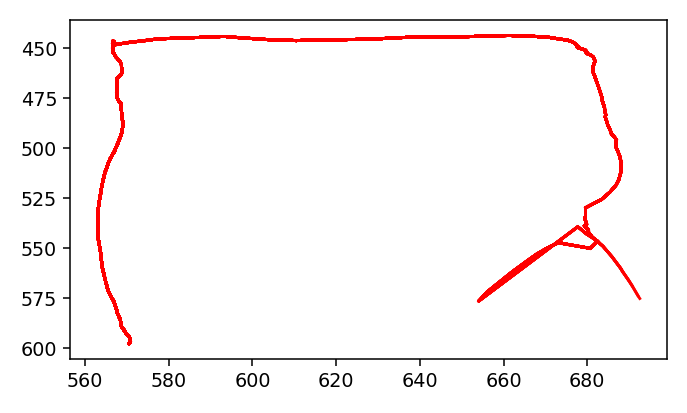

In [133]:
#import psutil
%matplotlib notebook

#plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [134]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()


<IPython.core.display.Javascript object>


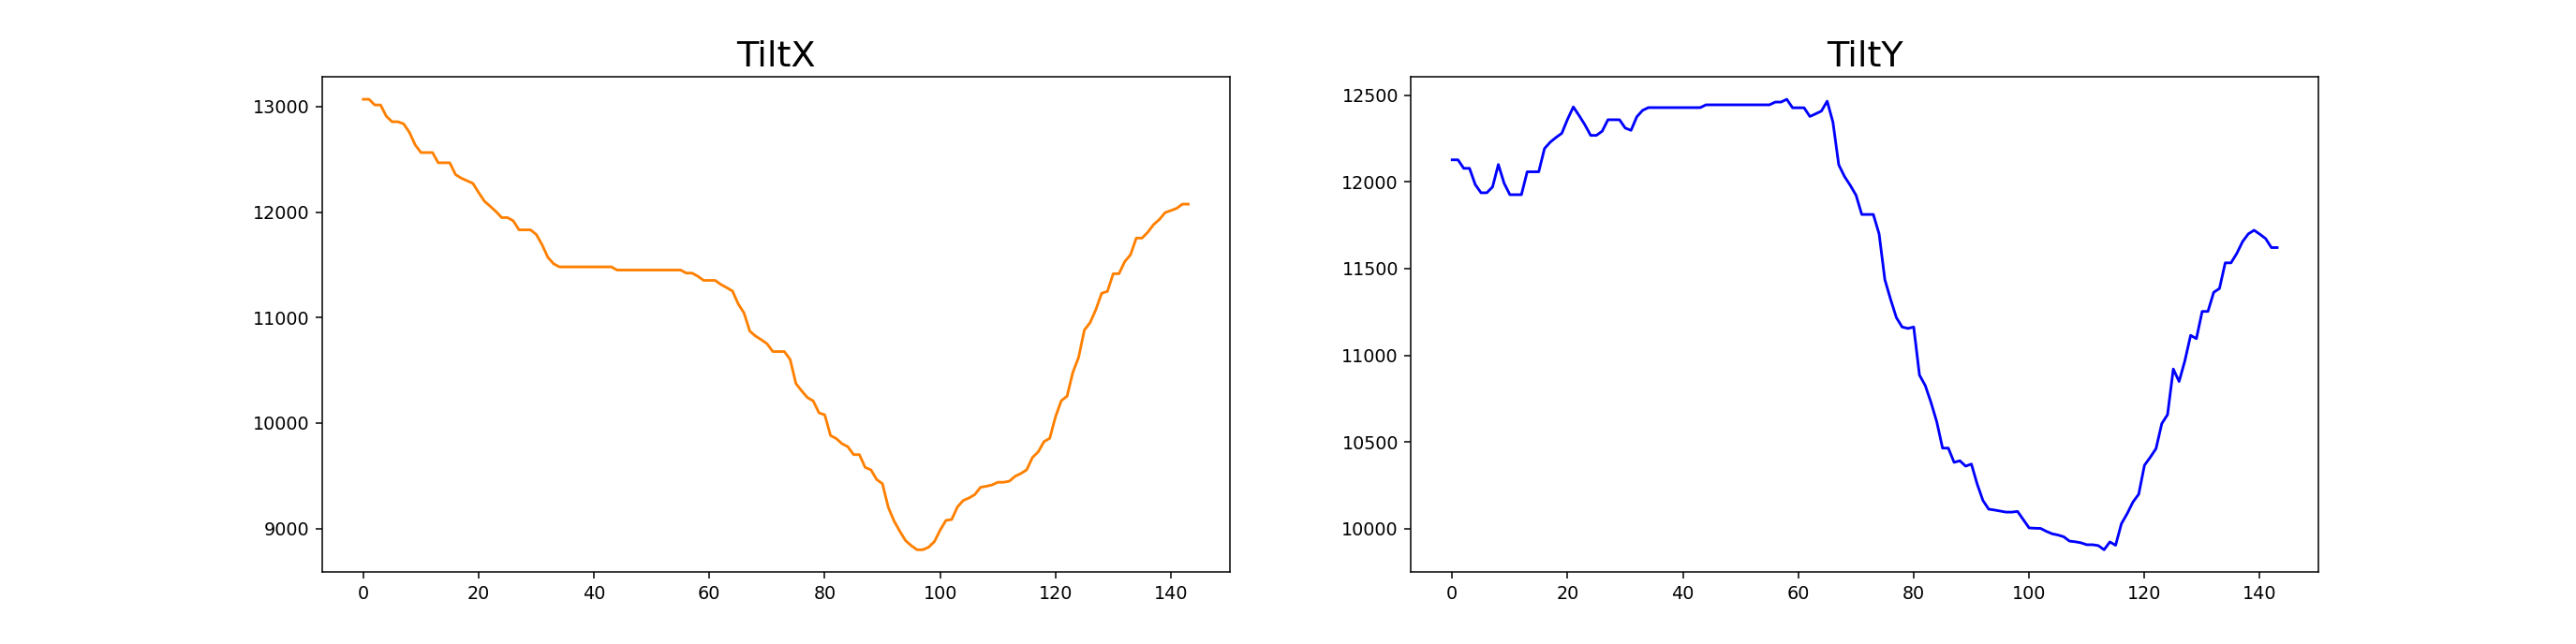

In [31]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.TiltX,"#FF8000")
ax.set_title("TiltX",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.TiltY,c='b')
ax2.set_title("TiltY",fontdict={'fontsize': 20})

plt.show()